In [22]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

In [28]:
inv_df=pd.read_excel(r"/home/jovyan/Jio-Mart-Ageing/Data/Inventory of Bhiwandi R280 & S537 as on 17.05.2021.xlsx",sheet_name="Sheet1")
shelf_df=pd.read_excel(r"/home/jovyan/Jio-Mart-Ageing/Data/Bhiwandi R280 BBD & Shelf Life Details.xlsx")

In [30]:
shelf_df["Best-Before Date"]=shelf_df["Best-Before Date"].astype('str')
shelf_df["Best-Before Date"]=pd.to_datetime(shelf_df["Best-Before Date"],format="%Y%m%d")
shelf_df

ValueError: time data '0' does not match format '%Y%m%d' (match)

In [3]:
inv_df_R280=inv_df.loc[inv_df["DC"]=="R280"]


In [4]:
inventory_df=pd.DataFrame()
group= inv_df_R280.groupby(["Article id "])
inventory_df["Stock"]=group["Stock"].agg(np.sum)
inventory_df["Stock_Value"]=group["Stock value"].agg(np.sum)
inventory_df=inventory_df.reset_index()
inventory_df=inventory_df.rename(columns={"Article id ":"Article Number"})
inventory_df

,Article Number,Stock,Stock_Value
0,490000001,35.0,2466.80
1,490000002,28.0,1784.44
2,490000003,395.0,48328.25
3,490000004,546.0,60518.64
4,490000006,133.0,46866.54
...,...,...,...
3512,492182916,0.0,0.00
3513,492182917,20.0,60571.40
3514,492183000,0.0,0.00
3515,581015113,441.0,4149.81


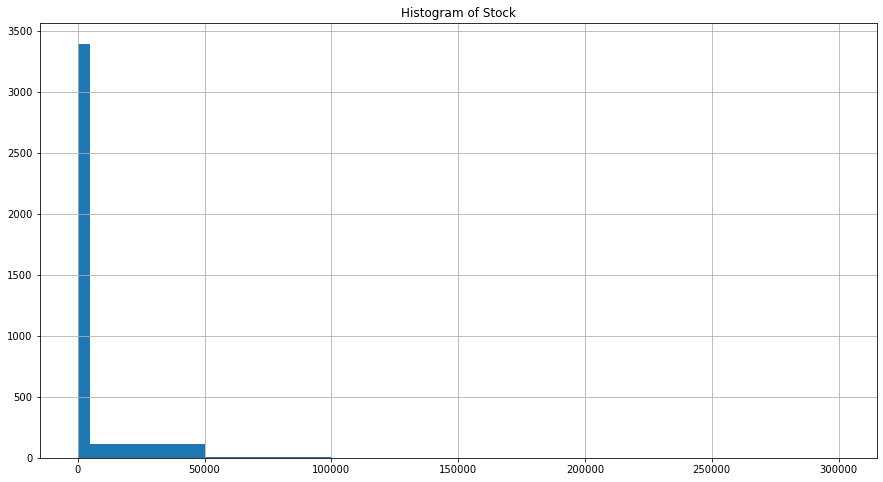

In [5]:
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
plt.title("Histogram of Stock")
inventory_df["Stock"].hist(ax=ax,bins=[0,5000,50000,100000,300000])

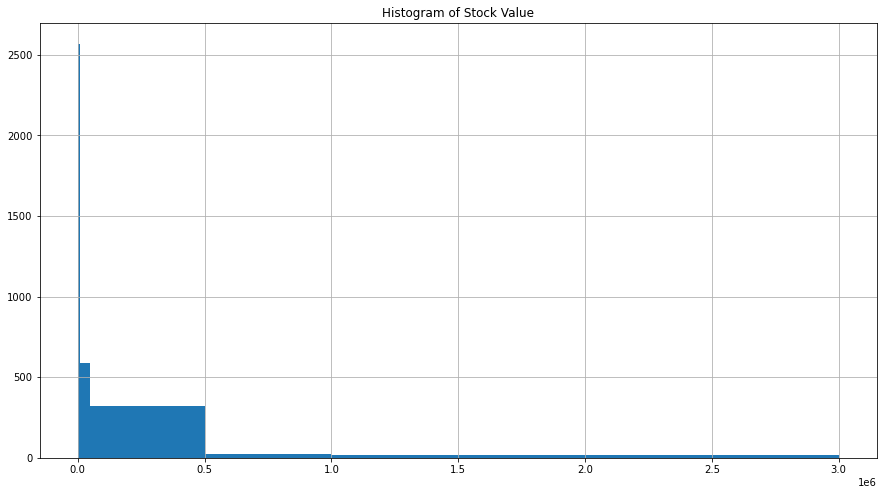

In [6]:
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
plt.title("Histogram of Stock Value")
inventory_df["Stock_Value"].hist(ax=ax,bins=[0,10000,50000,500000,1000000,3000000])

In [7]:
shelf_df=shelf_df[["Article Number","Best-Before Date"]].drop_duplicates()

In [8]:
merge_df=inventory_df.merge(shelf_df,how="left",on='Article Number')
merge_df

,Article Number,Stock,Stock_Value,Best-Before Date
0,490000001,35.0,2466.80,20220913.0
1,490000002,28.0,1784.44,20220909.0
2,490000003,395.0,48328.25,20230207.0
3,490000003,395.0,48328.25,20230305.0
4,490000004,546.0,60518.64,20230430.0
...,...,...,...,...
5282,492182917,20.0,60571.40,20210806.0
5283,492183000,0.0,0.00,20270716.0
5284,492183000,0.0,0.00,20210719.0
5285,581015113,441.0,4149.81,0.0


In [12]:
merge_df["Best-Before Date"].astype('str')

0       20220913.0
1       20220909.0
2       20230207.0
3       20230305.0
4       20230430.0
           ...    
5282    20210806.0
5283    20270716.0
5284    20210719.0
5285           0.0
5286           0.0
Name: Best-Before Date, Length: 5287, dtype: object

In [ ]:
merge_df